In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

### Differential evolution function

In [127]:
def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    """
    Returns (yields as generator) best solution following DE algorithm
    """
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
    
        yield best, fitness[best_idx]

In [96]:
def func1(x):
    import numpy as np
    result = (x%271)*np.sin(x/37)*np.exp(-0.001*x)+x%71
    return result

In [125]:
def foo(x):
    """
    x: An np.array
    """
    x=np.array(x)
    return sum(x**2) / len(x)

In [126]:
foo([2,0,4,0.5,1])

4.25

In [97]:
def plot_fitness(x,y):
    plt.figure(figsize=(15,5))
    plt.grid(True)
    plt.title("Fitness function",fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.plot(x,y,lw=3,c='blue')

In [122]:
lst=[i for i in range(-500,500)]
f=np.array(list(map(func1,lst)))

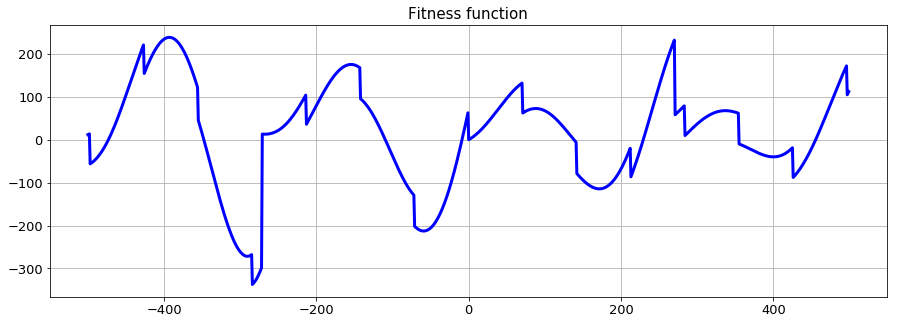

In [123]:
plot_fitness(lst,f)

In [144]:
it = list(de(fobj=func1, bounds=[(-500, 500)],its=10,popsize=10))
print(it[-1])

(array([-283.91949846]), array([-337.16631066]))


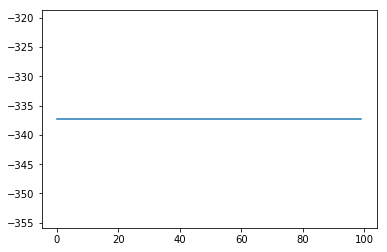

In [145]:
it=list(de(fobj=func1, bounds=[(-500, 500)],its=100,popsize=10))
x, fobj = zip(*it)
plt.plot(fobj)

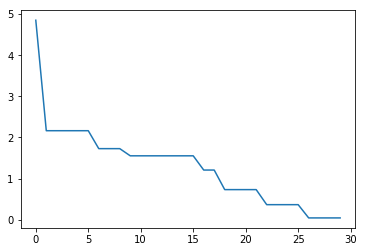

In [156]:
it=list(de(fobj=foo, bounds=[(-10, 10)]*5,its=30,popsize=10))
x, fobj = zip(*it)
plt.plot(fobj)

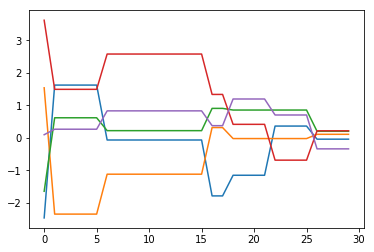

In [157]:
plt.plot(x)
plt.show()

In [160]:
from scipy.optimize import differential_evolution

In [162]:
differential_evolution(foo,bounds=[(-10, 10)]*5,maxiter=30,popsize=10,disp=True)

differential_evolution step 1: f(x)= 2.67634
differential_evolution step 2: f(x)= 2.67634
differential_evolution step 3: f(x)= 1.83984
differential_evolution step 4: f(x)= 1.34742
differential_evolution step 5: f(x)= 1.34742
differential_evolution step 6: f(x)= 0.785069
differential_evolution step 7: f(x)= 0.422487
differential_evolution step 8: f(x)= 0.298232
differential_evolution step 9: f(x)= 0.298232
differential_evolution step 10: f(x)= 0.298232
differential_evolution step 11: f(x)= 0.298232
differential_evolution step 12: f(x)= 0.00643947
differential_evolution step 13: f(x)= 0.00643947
differential_evolution step 14: f(x)= 0.00643947
differential_evolution step 15: f(x)= 0.00469533
differential_evolution step 16: f(x)= 0.00469533
differential_evolution step 17: f(x)= 0.00469533
differential_evolution step 18: f(x)= 0.00469533
differential_evolution step 19: f(x)= 0.00469533
differential_evolution step 20: f(x)= 0.00469533
differential_evolution step 21: f(x)= 0.00253918
differe

     fun: 2.505904595133531e-17
     jac: array([-3.54628313e-12,  7.81227530e-13, -5.89733701e-12,  1.87083188e-14,
       -3.15103238e-12])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 1568
     nit: 30
 success: False
       x: array([-5.00886571e-09, -4.99804693e-09, -5.01474334e-09, -4.99995323e-09,
       -5.00787758e-09])